In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import base64
from pathlib import Path

In [20]:
def write_to_file(plottah, filename):
    buf = io.BytesIO()
    plottah.savefig(buf, format='png')
    buf.seek(0)  # Rewind the buffer to the beginning
    prefix = "data:image/png;base64,"
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    (Path('plots') / filename).write_text(image_base64)

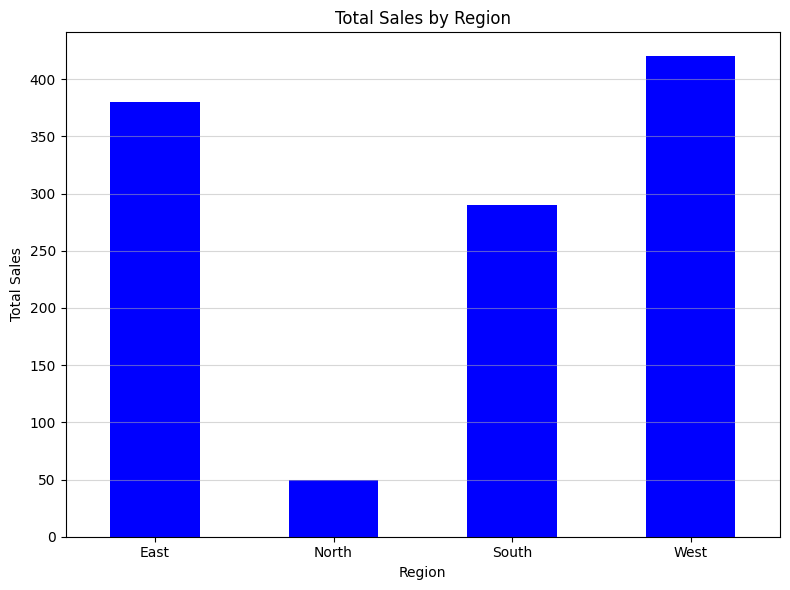

In [21]:
df = pd.read_csv('jail/sample-sales.csv')

# Group by region and sum the sales
sales_by_region = df.groupby('region')['sales'].sum()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sales_by_region.plot(kind='bar', color='blue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y', alpha=0.5) # Add a subtle grid
plt.tight_layout() # Adjust layout to prevent labels from overlapping

In [22]:
write_to_file(plt, "sales-bar")

<Figure size 640x480 with 0 Axes>

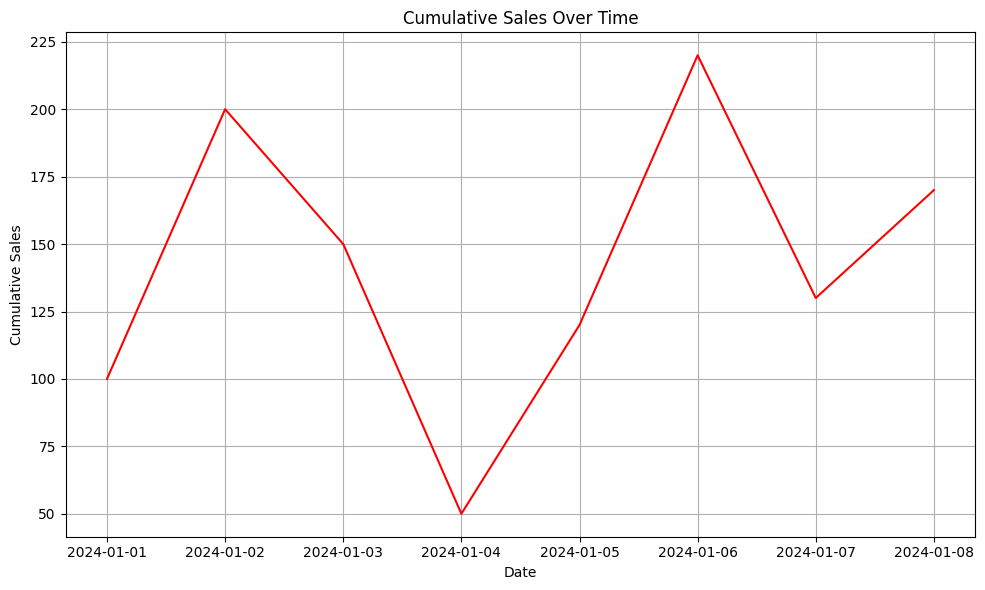

In [5]:
df = pd.read_csv('jail/sample-sales.csv')

# Group by region and sum the sales
sales_by_region = df.groupby('region')['sales'].sum()

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
df = df.sort_values(by='date')

# Create the cumulative sales line chart
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sales'], color='red')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.title('Cumulative Sales Over Time')
plt.grid(True)
plt.tight_layout()

In [6]:
write_to_file(plt, "sales-line")

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Network Graph')

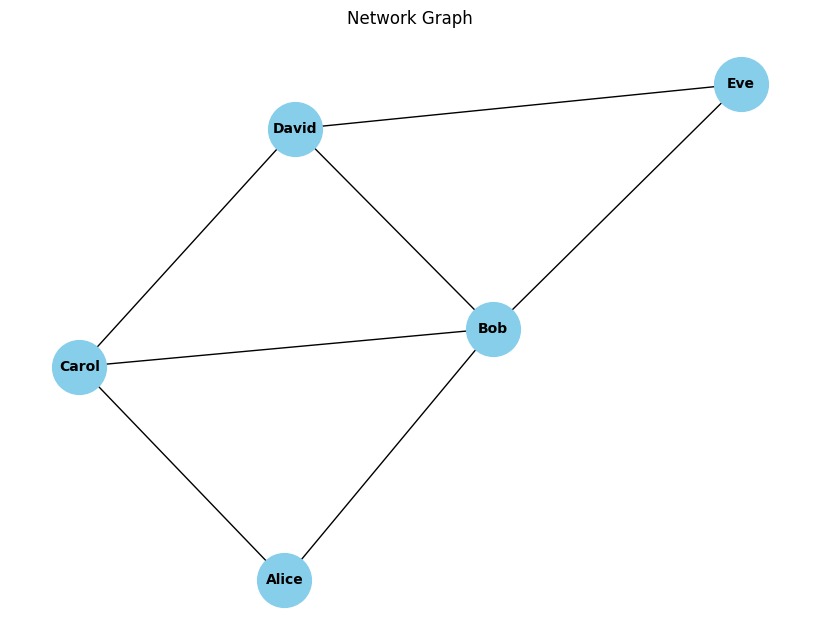

In [7]:
import networkx as nx

# Read the data from the CSV
edges_df = pd.read_csv("jail/edges.csv")

# Create a graph
G = nx.Graph()

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Network Graph")

In [8]:
write_to_file(plt, "edges-network")

<Figure size 640x480 with 0 Axes>

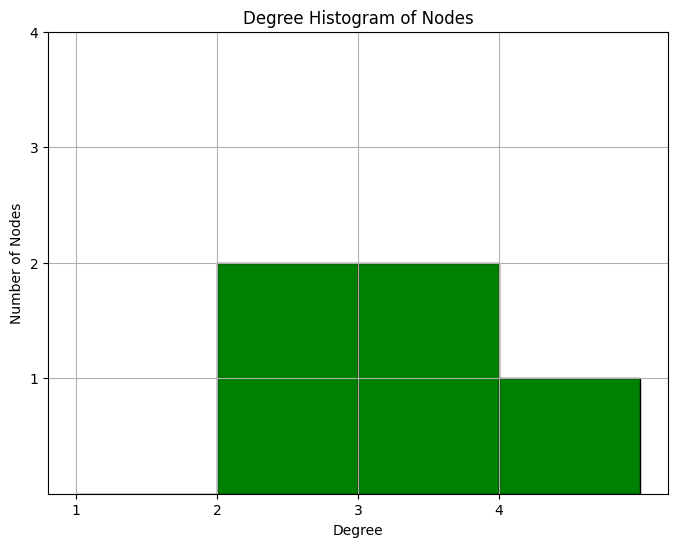

In [9]:
# Read the data from the CSV
edges_df = pd.read_csv("jail/edges.csv")

# Create a graph
G = nx.Graph()

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

# Calculate degree for each node
degree = dict(G.degree())

# Create degree histogram
plt.figure(figsize=(8, 6))
plt.hist(degree.values(), bins=range(min(degree.values()) - 1, max(degree.values()) + 2), color='green', 
edgecolor='black')
plt.xticks(range(min(degree.values())-1, max(degree.values()) + 1))
plt.yticks(range(min(degree.values())-1, max(degree.values()) + 1))
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Histogram of Nodes")
plt.grid(True)

In [10]:
write_to_file(plt, "edges-histogram")

<Figure size 640x480 with 0 Axes>

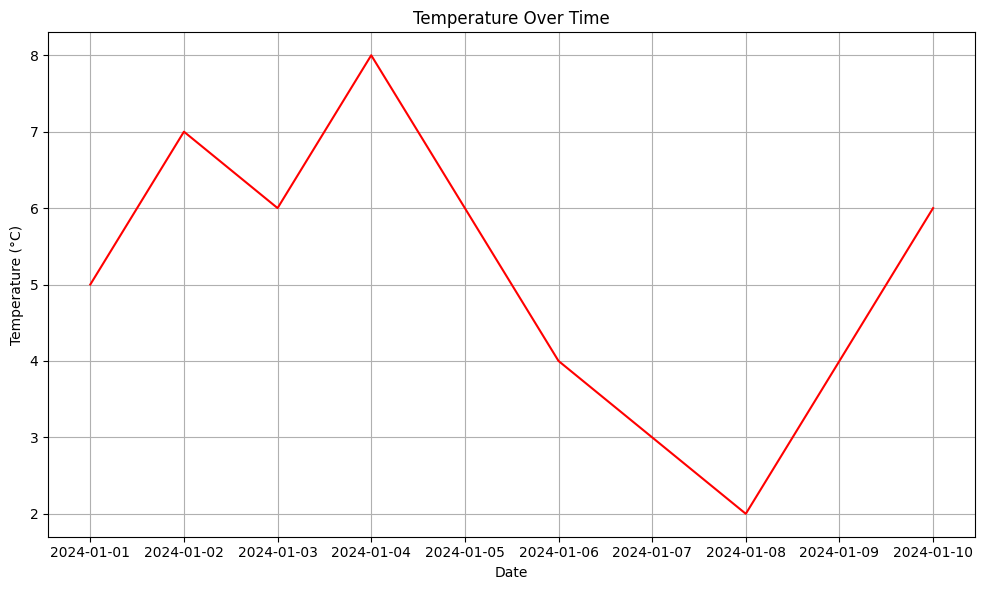

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV
weather_df = pd.read_csv("jail/sample-weather.csv")

# Convert 'date' column to datetime objects
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Sort the DataFrame by date
weather_df = weather_df.sort_values(by='date')

# Create the temperature over time line chart
plt.figure(figsize=(10, 6))
plt.plot(weather_df['date'], weather_df['temperature_c'], color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.grid(True)
plt.tight_layout()

In [12]:
write_to_file(plt, "weather-line")

<Figure size 640x480 with 0 Axes>

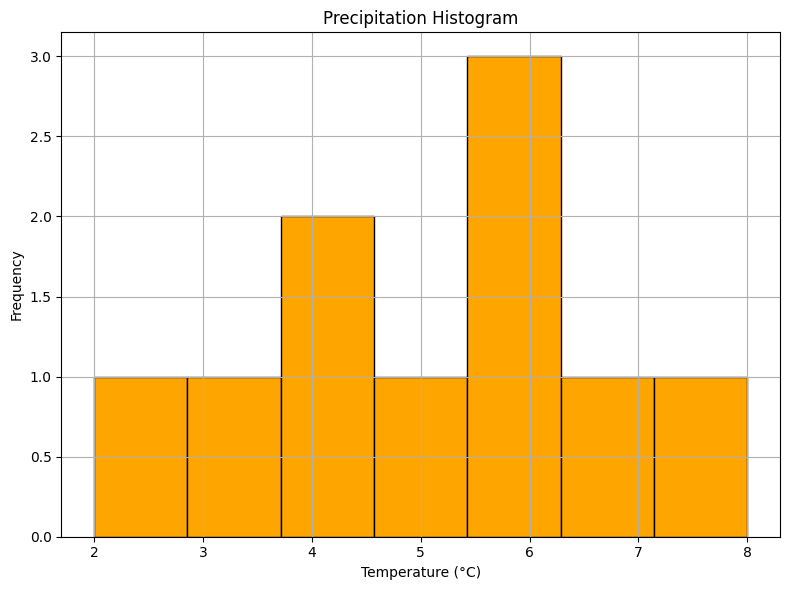

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(weather_df['temperature_c'], bins=7, color='orange', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Precipitation Histogram')
plt.grid(True)
plt.tight_layout()

In [14]:
write_to_file(plt, "weather-histogram")

<Figure size 640x480 with 0 Axes>